### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
from scipy.stats import iqr


In [52]:
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [53]:
data = pd.read_csv('malaria.csv')
data.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
data.shape

(127, 16)

In [56]:
(data.isnull().sum()/data.shape[0]) * 100

Cases_Guinea           26.771654
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Cases_Nigeria          70.078740
Cases_Senegal          80.314961
Cases_UnitedStates     42.519685
Cases_Spain            87.401575
Cases_Mali             90.551181
Deaths_Guinea          27.559055
Deaths_Liberia         36.220472
Deaths_SierraLeone     31.496063
Deaths_Nigeria         70.078740
Deaths_Senegal         82.677165
Deaths_UnitedStates    55.118110
Deaths_Spain           87.401575
Deaths_Mali            90.551181
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
data.shape

(127, 16)

In [6]:
# data.isnull().sum()/ data.shape[0]) * 100
print(data.columns[((data.isnull().sum()/data.shape[0]) * 100 ) > 60])

# print(data.columns[data.isnull().mean() > 0.6])


Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [7]:
((data.isnull().sum()/data.shape[0]) * 100).sort_values(ascending = False)

Cases_Mali             90.551181
Deaths_Mali            90.551181
Cases_Spain            87.401575
Deaths_Spain           87.401575
Deaths_Senegal         82.677165
Cases_Senegal          80.314961
Cases_Nigeria          70.078740
Deaths_Nigeria         70.078740
Deaths_UnitedStates    55.118110
Cases_UnitedStates     42.519685
Deaths_Liberia         36.220472
Cases_Liberia          34.645669
Cases_SierraLeone      31.496063
Deaths_SierraLeone     31.496063
Deaths_Guinea          27.559055
Cases_Guinea           26.771654
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries & find which has highest missing values)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
data.columns

Index(['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone', 'Cases_Nigeria',
       'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [9]:
first_four = data.iloc[:, :4]
# first_four.isnull().mean() * 100)
(first_four.isnull().mean() * 100).idxmax()

'Cases_Nigeria'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

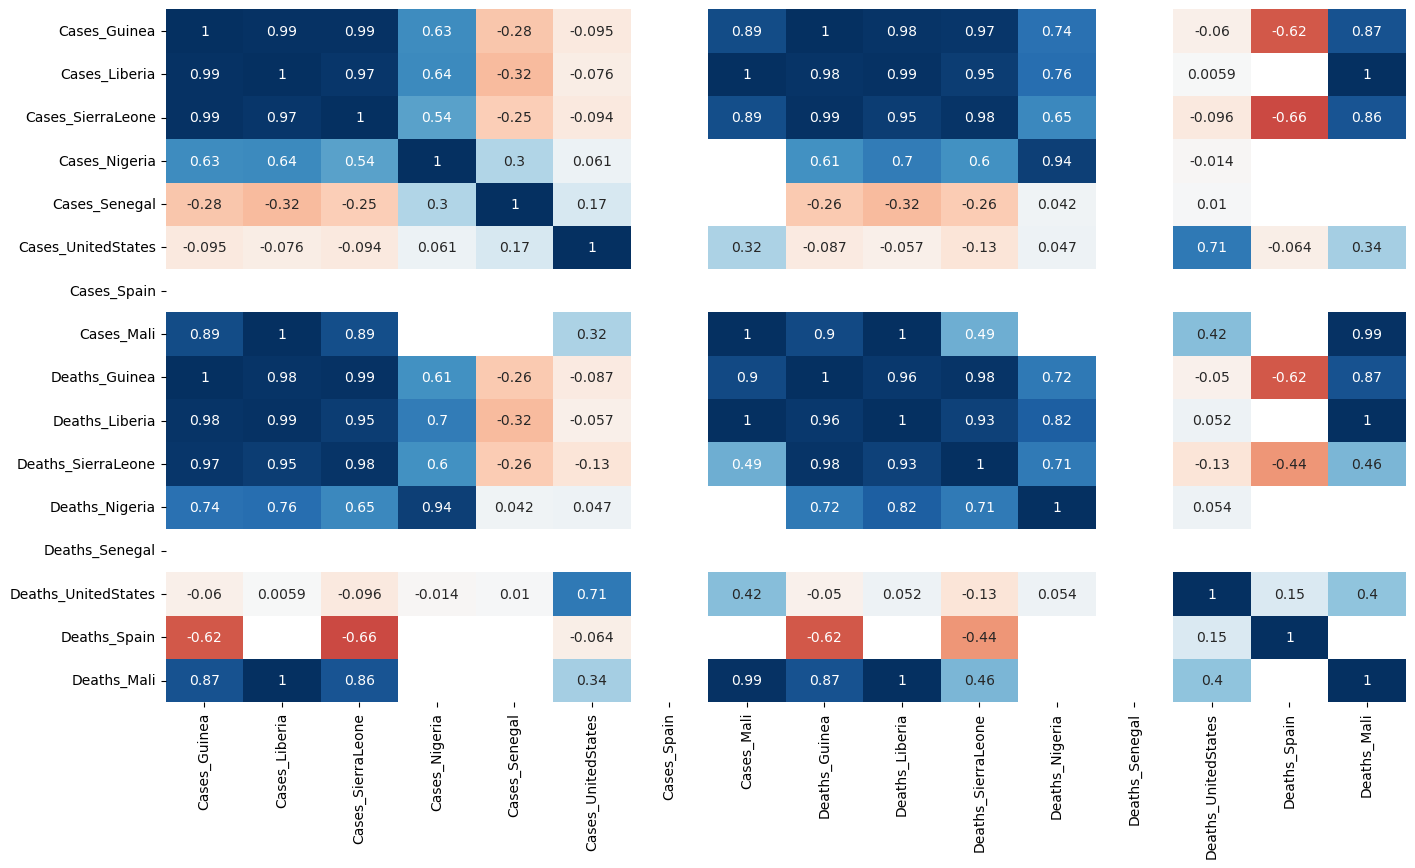

In [10]:
plt.figure(figsize = (16,9))
sns.heatmap(data = data.corr(), vmax=1, vmin=-1, cmap='RdBu', cbar=False,annot=True)

<Axes: >

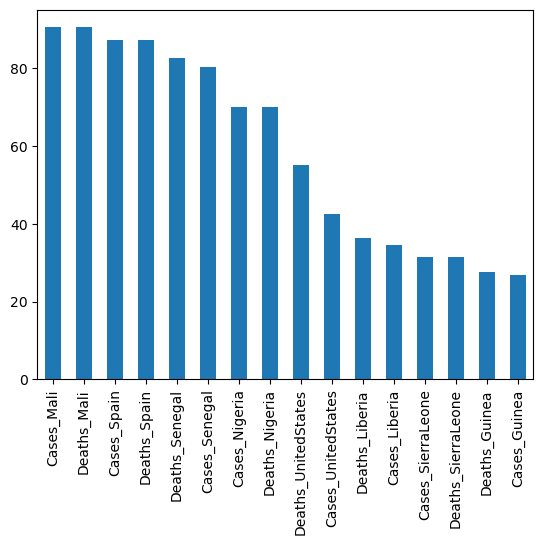

In [11]:
# missvalues=data.isnull().sum().sort_values(ascending=False)
missvalues=(data.isnull().mean().sort_values(ascending = False) )*100
# missvalues
missvalues.plot(kind='bar')

Mali, Spain, Senegal, Nigeria are the variables which have over 70% data missing in them. It's better to not consider them, 
Other variables can be delt with imputations methods

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where two or less than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
data.shape


(127, 16)

In [13]:
# filtered data
filtered_data = data[data.notnull().sum(axis=1)>2]
filtered_data.shape

(110, 16)

In [14]:
# filtered_data
filtered_data

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,83.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
119,122.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,80.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
120,112.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
121,112.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,70.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN


In [15]:
((filtered_data.isnull().sum()/filtered_data.shape[0]) * 100).sort_values(ascending = False)

Cases_Mali             89.090909
Deaths_Mali            89.090909
Cases_Spain            85.454545
Deaths_Spain           85.454545
Deaths_Senegal         80.000000
Cases_Senegal          77.272727
Cases_Nigeria          65.454545
Deaths_Nigeria         65.454545
Deaths_UnitedStates    49.090909
Cases_UnitedStates     34.545455
Deaths_Liberia         29.090909
Cases_Liberia          28.181818
Cases_SierraLeone      22.727273
Deaths_Guinea          21.818182
Deaths_SierraLeone     21.818182
Cases_Guinea           20.909091
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Inference :-
Mali, Spain, Senegal, Nigeria columns have the most missing values. So, I think it's better to drop these columns cuz they have more than 65% data missing

In [16]:
filtered_data.shape

(110, 16)

In [17]:
filtered_data = filtered_data.drop(columns=['Cases_Mali','Cases_Spain','Cases_Senegal', 'Cases_Nigeria', 'Deaths_Mali','Deaths_Spain', 'Deaths_Senegal'
                           ,'Deaths_Nigeria'])
filtered_data



,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
5,2730.0,8115.0,9633.0,7.0,1739.0,3471.0,2827.0,5.0
...,...,...,...,...,...,...,...,...
118,127.0,8.0,2.0,NaN,83.0,5.0,2.0,NaN
119,122.0,8.0,2.0,NaN,80.0,4.0,2.0,NaN
120,112.0,7.0,NaN,NaN,70.0,2.0,NaN,NaN
121,112.0,3.0,2.0,NaN,70.0,3.0,2.0,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
filtered_data['Cases_Liberia'].isnull().sum()

31

In [19]:
filtered_data['Cases_Liberia'].isnull().mean() * 100

28.18181818181818

Around 28% of the Data is missing in Cases_Liberia. Now we will Analysis further :-
1. Skewness Distribution of the data 


In [20]:
case_liberia_median = filtered_data['Cases_Liberia'].median()
case_liberia_mode= filtered_data['Cases_Liberia'].mode()
print('Median :' ,case_liberia_median, ' ', 'Mode :', case_liberia_mode.values)

Median : 468.0   Mode : [13.]


In [21]:
case_liberia_values = filtered_data['Cases_Liberia'].describe().to_dict()
case_liberia_values

{'count': 79.0,
 'mean': 2283.53164556962,
 'std': 2999.2451564687244,
 'min': 3.0,
 '25%': 23.0,
 '50%': 468.0,
 '75%': 4162.5,
 'max': 8166.0}

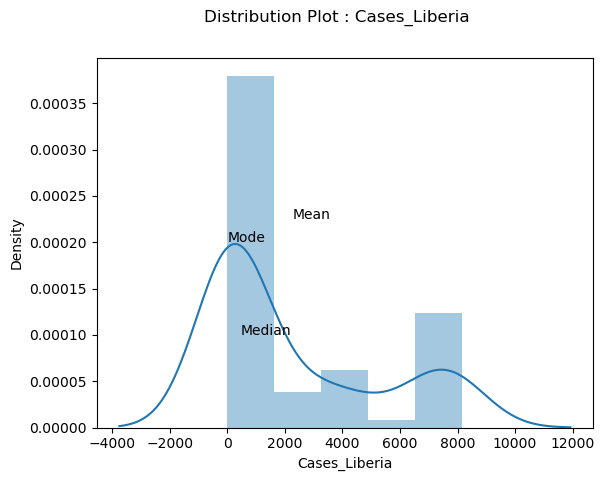

In [22]:
# temp_removed_libera_na = filtered_data['Cases_Liberia'].dropna()
sns.distplot(filtered_data['Cases_Liberia'])
plt.suptitle('Distribution Plot : Cases_Liberia')
plt.text(x=case_liberia_median,y=0.0001,s='Median')
plt.text(x=case_liberia_mode[0],y=0.0002,s='Mode')
plt.text(x=case_liberia_values['mean'],y=0.000225,s='Mean')
plt.show()

##### Observation :-

1. The Observation shows that the mean > median > mode which tends towards right side tail,
    so it consider as Right - Skewed Distribution 
2. We will use median to replace Null values in this case

### Treating  missing values for Cases_Liberia

In [23]:
filtered_data['Cases_Liberia'].fillna(case_liberia_median, inplace=True)

In [24]:
filtered_data['Cases_Liberia'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
filtered_data['Cases_UnitedStates']

0       NaN
1       NaN
2      20.0
3      10.0
5       7.0
       ... 
118     NaN
119     NaN
120     NaN
121     NaN
122     NaN
Name: Cases_UnitedStates, Length: 110, dtype: float64

In [26]:
filtered_data['Cases_UnitedStates'].isnull().sum()

38

In [27]:
case_usa_median = filtered_data['Cases_UnitedStates'].median()
case_usa_mode = filtered_data['Cases_UnitedStates'].mode()
print('Median :', case_usa_median,' ', 'Mode :', case_usa_mode.values)

case_usa_values = filtered_data['Cases_UnitedStates'].describe().to_dict()
case_usa_values

Median : 13.0   Mode : [ 7. 10. 13.]


{'count': 72.0,
 'mean': 14.083333333333334,
 'std': 7.823312939676689,
 'min': 1.0,
 '25%': 7.75,
 '50%': 13.0,
 '75%': 20.0,
 'max': 34.0}

Text(13.0, 0.02, 'Mode:13.0')

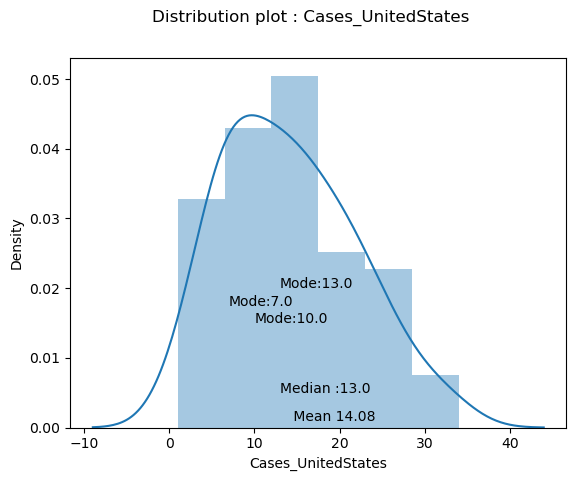

In [28]:
sns.distplot(filtered_data['Cases_UnitedStates'], kde=True)
plt.suptitle('Distribution plot : Cases_UnitedStates')

plt.text(x=case_usa_median, y=0.005,s=f'Median :{case_usa_median}')

plt.text(x=case_usa_values['mean'], y=0.001,s=f" Mean {case_usa_values['mean']:.2f} ")

plt.text(x=case_usa_mode[0], y=0.0175,s=f'Mode:{case_usa_mode[0]}')
plt.text(x=case_usa_mode[1], y=0.015,s= f"Mode:{case_usa_mode[1]}")
plt.text(x=case_usa_mode[2], y=0.02,s= f"Mode:{case_usa_mode[2]}")

#### Observation : --

Distribution is slightly right-skewed mean> median> mode. Thus we will use median to Imputate the NULL Values 

In [29]:
filtered_data['Cases_UnitedStates'].fillna(case_usa_median, inplace=True)

In [30]:
filtered_data['Cases_UnitedStates'].isnull().sum()

0

<Axes: xlabel='Cases_UnitedStates', ylabel='Density'>

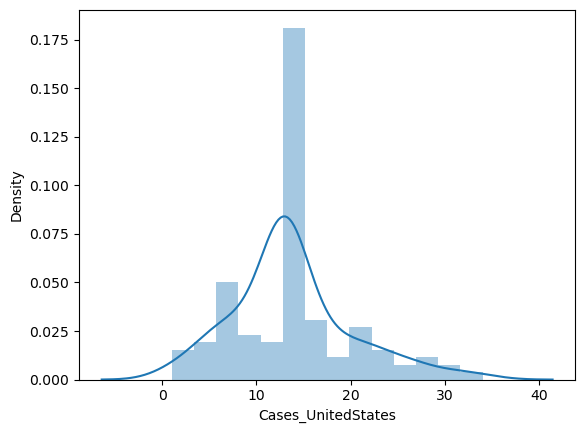

In [31]:
sns.distplot(filtered_data['Cases_UnitedStates'], kde=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
filtered_data['Cases_Guinea']

0      2776.0
1      2775.0
2      2769.0
3         NaN
5      2730.0
        ...  
118     127.0
119     122.0
120     112.0
121     112.0
122     103.0
Name: Cases_Guinea, Length: 110, dtype: float64

In [33]:
filtered_data['Cases_Guinea'].isnull().sum()

23

In [34]:
case_guinea_median = filtered_data['Cases_Guinea'].median()
case_guinea_mode = filtered_data['Cases_Guinea'].mode()

print('Median :', case_guinea_median,' ', 'Mode :', case_guinea_mode.values)

case_guinea_values = filtered_data['Cases_Guinea'].describe().to_dict()
case_guinea_values

Median : 506.0   Mode : [112. 390. 495.]


{'count': 87.0,
 'mean': 956.8505747126437,
 'std': 854.5460855308961,
 'min': 103.0,
 '25%': 286.0,
 '50%': 506.0,
 '75%': 1546.5,
 'max': 2776.0}

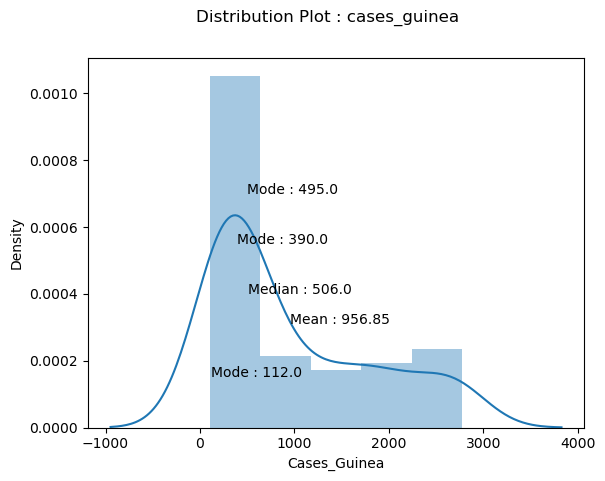

In [35]:
sns.distplot(filtered_data['Cases_Guinea'], kde=True)
plt.suptitle('Distribution Plot : cases_guinea')
plt.text(x = case_guinea_median, y = 0.0004, s = f"Median : {case_guinea_median}")

plt.text(x = case_guinea_values['mean'], y = 0.00031, s = f"Mean : {case_guinea_values['mean']:.2f}")


#Mode 
t = 0
j = 1
for i in case_guinea_mode:
    if j == 3:
        t = 0.00055
    plt.text(x = i, y = 0.00015 + t, s = f"Mode : {i}" )
    t = 0.0004
    j += 1

#### Observation :
 This plot also tends towards right a.k.a ~ Right Skewed Graph. Again we will use Median to inputate the Null Values

In [36]:
filtered_data['Cases_Guinea'].fillna(case_guinea_median, inplace=True)

In [37]:
filtered_data['Cases_Guinea'].isnull().sum()

0

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

In [38]:
data_house = pd.read_csv('house.csv')

In [39]:
data_house.shape

(4766, 10)

In [40]:
data_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [41]:
data_house.tail()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
4761,3,h,1150000,VB,Southern Metropolitan,2,1,305,18.7,3
4762,3,h,712000,S,South-Eastern Metropolitan,1,0,105,16.0,4
4763,4,h,800000,S,South-Eastern Metropolitan,1,0,120,24.5,3
4764,3,u,747000,S,South-Eastern Metropolitan,1,1,0,22.9,3
4765,3,h,800000,SP,South-Eastern Metropolitan,1,1,0,13.7,3


In [42]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rooms       4766 non-null   int64  
 1   Type        4766 non-null   object 
 2   Price       4766 non-null   int64  
 3   Method      4766 non-null   object 
 4   Regionname  4766 non-null   object 
 5   Bathroom    4766 non-null   int64  
 6   Car         4766 non-null   int64  
 7   Landsize    4766 non-null   int64  
 8   Distance    4766 non-null   float64
 9   Bedroom     4766 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 372.5+ KB


In [43]:
data_house.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,4766.0,3.083718e+00,0.937456,1.0,2.0,3.0,4.0,8.0
Price,4766.0,1.019577e+06,629225.399174,112000.0,620000.0,840000.0,1244250.0,6240000.0
Bathroom,4766.0,1.587495e+00,0.751496,0.0,1.0,1.0,2.0,12.0
Car,4766.0,1.588754e+00,0.971575,0.0,1.0,2.0,2.0,26.0
Landsize,4766.0,4.496922e+02,1189.628606,0.0,155.0,370.0,640.0,75100.0
Distance,4766.0,1.932835e+01,4.230650,5.0,16.5,19.3,22.2,33.1
Bedroom,4766.0,2.941251e+00,1.058771,0.0,2.0,3.0,4.0,30.0


#### Checking the NULL Values in the columns 


In [44]:
data_house.isnull().sum()

Rooms         0
Type          0
Price         0
Method        0
Regionname    0
Bathroom      0
Car           0
Landsize      0
Distance      0
Bedroom       0
dtype: int64

#### Observation :-

There is no-NULL values in the dataset ~ house.csv

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
data_house.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,4766.0,3.083718e+00,0.937456,1.0,2.0,3.0,4.0,8.0
Price,4766.0,1.019577e+06,629225.399174,112000.0,620000.0,840000.0,1244250.0,6240000.0
Bathroom,4766.0,1.587495e+00,0.751496,0.0,1.0,1.0,2.0,12.0
Car,4766.0,1.588754e+00,0.971575,0.0,1.0,2.0,2.0,26.0
Landsize,4766.0,4.496922e+02,1189.628606,0.0,155.0,370.0,640.0,75100.0
Distance,4766.0,1.932835e+01,4.230650,5.0,16.5,19.3,22.2,33.1
Bedroom,4766.0,2.941251e+00,1.058771,0.0,2.0,3.0,4.0,30.0


In [49]:
data_house.describe().to_dict().keys()

dict_keys(['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Bedroom'])

In [50]:
dict_house = data_house.describe().to_dict()
for i in dict_house.keys():
    print(i, ", " ,' min ',dict_house[i]['min'], ", " , 'mean ' ,dict_house[i]['mean'],", " , 'max ' ,dict_house[i]['max'])
    print('median : ', data_house[i].median(), ' ', 'mode : ', data_house[i].mode()[0])
    
    if int(dict_house[i]['mean']) > int(data_house[i].median()) :
        print('Right Skewed Plot')
        
    elif int(data_house[i].median()) > int(dict_house[i]['mean']) :
        print('Left Skewed Plot')
        
    else:
        print('Normal Dist.')
        
    print()
    

Rooms ,   min  1.0 ,  mean  3.0837180025178346 ,  max  8.0
median :  3.0   mode :  3
Normal Dist.

Price ,   min  112000.0 ,  mean  1019577.0480486781 ,  max  6240000.0
median :  840000.0   mode :  600000
Right Skewed Plot

Bathroom ,   min  0.0 ,  mean  1.5874947545111204 ,  max  12.0
median :  1.0   mode :  1
Normal Dist.

Car ,   min  0.0 ,  mean  1.5887536718422157 ,  max  26.0
median :  2.0   mode :  1
Left Skewed Plot

Landsize ,   min  0.0 ,  mean  449.69219471254723 ,  max  75100.0
median :  370.0   mode :  0
Right Skewed Plot

Distance ,   min  5.0 ,  mean  19.328346621905162 ,  max  33.1
median :  19.3   mode :  18.7
Normal Dist.

Bedroom ,   min  0.0 ,  mean  2.941250524548888 ,  max  30.0
median :  3.0   mode :  3
Left Skewed Plot



#### Observation :
##### Rooms, Bathroom, Distance are the only features that can exempted by the outliers because their median, mode isn't far away from the mean.
##### Rest features like Price [Right Skewed], Car [Left Skewed], Landsize [Right Skewed], Bedroom [Left Skewed] can be imputed by Outliers Methods.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
data_house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [49]:
data_house['Car']

0       1
1       1
2       0
3       1
4       0
       ..
4761    1
4762    0
4763    0
4764    1
4765    1
Name: Car, Length: 4766, dtype: int64

In [50]:
# Check the missing values
data_house['Car'].isnull().sum()

0

In [51]:
q1, q3 = np.quantile(data_house['Car'],[0.25,0.75])

iqr_car = (q3 - q1)

car_lb = (q1 - (1.5 * iqr_car))
car_ub = (q3 + (1.5 * iqr_car))
print(car_lb, ' to ', car_ub)

-0.5  to  3.5


#### Inference :

Beyond -0.5 to 3.5 there are Outliers in Car variable

Now, we will fetch the outliers from Car Dataset

<Axes: >

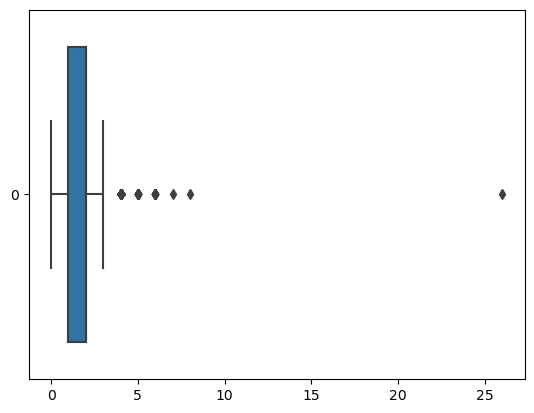

In [52]:
sns.boxplot(data_house['Car'], orient='h')

In [53]:
removed_car_outliers = data_house[(data_house['Car'] < car_lb) | (data_house['Car'] > car_ub)]['Car']

Compare Filtered Outlier Dataset with the previous one then, we have a difference (4766 - 4560) = 206

Belows are the outliers values 

In [54]:
removed_car_outliers

56      5
58      4
117     4
122     4
123     4
       ..
4585    4
4586    4
4588    4
4641    5
4690    4
Name: Car, Length: 206, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [55]:
data_house['Price']

0       1490000
1       1220000
2       1420000
3       1515000
4        670000
         ...   
4761    1150000
4762     712000
4763     800000
4764     747000
4765     800000
Name: Price, Length: 4766, dtype: int64

In [56]:
data_house['Price'].describe()['min']

112000.0

In [57]:
print('Mean : ', data_house['Price'].describe()['mean'])
print('Median : ', data_house['Price'].median())
print('Median : ', data_house['Price'].mode()[0])

Mean :  1019577.0480486781
Median :  840000.0
Median :  600000


<Axes: xlabel='Price', ylabel='Density'>

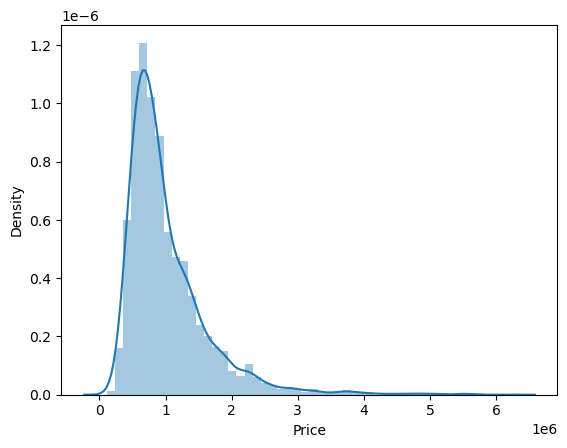

In [58]:
sns.distplot(data_house['Price'])

In [59]:
q1, q3 = np.quantile(data_house['Price'],[0.25, 0.75])
iqr_price = (q3 - q1)
print(iqr_price)
price_lb = q1 - (1.5 * iqr_price)
price_up = q3 + (1.5 * iqr_price)
print('lower bound ', price_lb, ' to ', 'upper bound ',price_up)

624250.0
lower bound  -316375.0  to  upper bound  2180625.0


#### Price Variable is Right - Skewed 
where, 
Mean :  1019577.048,
Median :  840000.0,
Median :  600000

In [60]:
price_outliers = data_house[(data_house['Price']> price_up) | (data_house['Price'] < price_lb)]

price_outliers

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
25,4,h,2600000,VB,Southern Metropolitan,2,1,119,16.6,3
27,4,h,2470000,PI,Southern Metropolitan,2,2,4290,22.0,3
39,4,h,3000000,S,Southern Metropolitan,1,1,172,15.0,2
47,4,h,2250000,VB,Southern Metropolitan,1,1,110,16.2,2
49,4,h,2975000,S,Southern Metropolitan,1,1,265,16.3,3
...,...,...,...,...,...,...,...,...,...,...
4556,5,h,2525000,SP,Northern Metropolitan,1,1,161,17.9,2
4658,5,h,4515000,PI,Southern Metropolitan,1,2,219,18.1,4
4682,3,h,2400000,VB,Western Metropolitan,1,1,558,9.9,2
4748,4,h,3600000,VB,Southern Metropolitan,2,1,190,23.1,2


In [61]:
# Price Outliers 
price_outliers.groupby(by = "Type")['Price'].sum()

Type
h    707709000
t     18406000
u     13145000
Name: Price, dtype: int64

In [62]:
data_house[(data_house['Price']< price_up) & (data_house['Price'] > price_lb)].groupby(by = "Type")['Price'].sum()

Type
h    3094780106
t     429996768
u     595267337
Name: Price, dtype: int64

 type h (price_outliers values ) is greater than type h (price_not_outliers)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
data_house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [64]:
data_house['Rooms']

0       3
1       3
2       3
3       3
4       2
       ..
4761    3
4762    3
4763    4
4764    3
4765    3
Name: Rooms, Length: 4766, dtype: int64

In [65]:
data_house['Rooms'].describe()

count    4766.000000
mean        3.083718
std         0.937456
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: Rooms, dtype: float64

In [66]:
q1,q3 = np.quantile(data_house['Rooms'],[0.25,0.75])

In [67]:
iqr_rooms = iqr(data_house['Rooms'])
iqr_rooms

2.0

In [68]:
rooms_lb = q1 - (1.5 * iqr_rooms)
rooms_ub = q3 + (1.5 * iqr_rooms)
print('Extreme values are')
print(rooms_lb, ' to ', rooms_ub)

Extreme values are
-1.0  to  7.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
data_house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [70]:
bathrooms_median = data_house['Bathroom'].median() 
bathrooms_mean = data_house['Bathroom'].mean() 
bathrooms_mode = data_house['Bathroom'].mode()[0]

print('mean : ', bathrooms_mean, ' | ','median : ', bathrooms_median, ' | ','mode : ', bathrooms_mode)

mean :  1.5874947545111204  |  median :  1.0  |  mode :  1


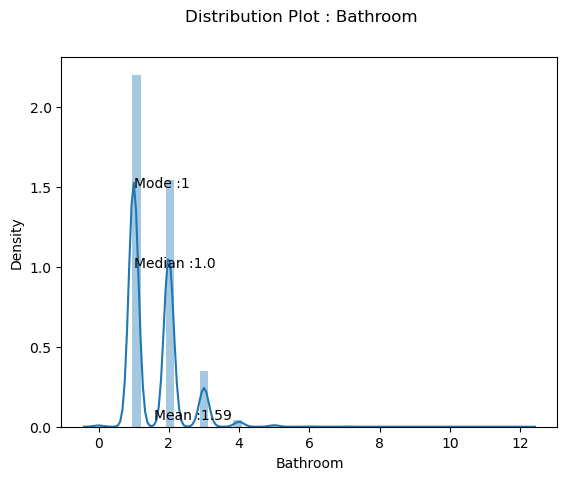

In [71]:
sns.distplot(data_house['Bathroom'], kde = True)
plt.suptitle('Distribution Plot : Bathroom')

plt.text(x = bathrooms_mean, y = 0.05, s = f"Mean :{bathrooms_mean:.2f}")
plt.text(x = bathrooms_median, y = 1, s = f"Median :{bathrooms_median}")
plt.text(x = bathrooms_mode, y = 1.5, s = f"Mode :{bathrooms_mode}")

plt.show()

Plot is Right Skewed 

We will consider IQR method fot this case

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
data_house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [73]:
data_house['Bedroom']

0       2
1       2
2       2
3       3
4       3
       ..
4761    3
4762    4
4763    3
4764    3
4765    3
Name: Bedroom, Length: 4766, dtype: int64

In [74]:
data_house['Bedroom'].isnull().sum()

0

In [75]:
bedroom_median = data_house['Bedroom'].median()
bedroom_mean = data_house['Bedroom'].mean()
bedroom_mode = data_house['Bedroom'].mode()[0]

print('mean : ', bedroom_mean, ' | ','median : ', bedroom_median, ' | ','mode : ', bedroom_mode)

mean :  2.941250524548888  |  median :  3.0  |  mode :  3


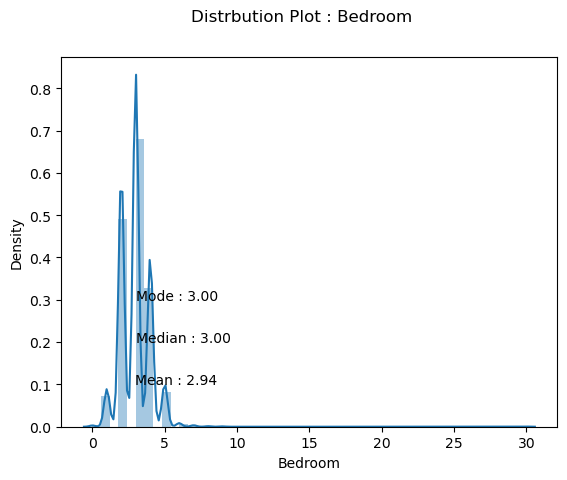

In [76]:
sns.distplot(data_house['Bedroom'], kde=True)
plt.suptitle('Distrbution Plot : Bedroom')

plt.text(x = bedroom_mean, y = 0.1, s = f"Mean : {bedroom_mean:.2f}")
plt.text(x = bedroom_median, y = 0.2, s = f"Median : {bedroom_median:.2f}")
plt.text(x = bedroom_mode, y = 0.3, s = f"Mode : {bedroom_mode:.2f}")

plt.show()

In [77]:
q3,q1=np.quantile(data_house['Bedroom'],[0.75,0.25])
iqr_bedroom=q3-q1
iqr_bedroom

2.0

In [78]:
ul_bedroom = q3+(1.5*iqr_bedroom)
# ul_bedroom
ll_bedroom = q1-(1.5*iqr_bedroom)
# ll_bedroom

In [79]:
outliersbedroom= data_house[(data_house['Bedroom']>ul_bedroom) | (data_house['Bedroom']<ll_bedroom)]
outliersbedroom

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8
